In [ ]:
#SIMPLE VECTOR REGRESSOR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.datasets import make_regression
x,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3) #noise means outlier

In [ ]:
x

array([[-0.41864638, -1.09306424],
       [-0.15930331, -0.82464527],
       [ 0.96559298, -0.44799208],
       ...,
       [ 0.25205975,  1.16848177],
       [ 0.41293451, -0.78105757],
       [-1.0174594 ,  0.4124513 ]])

<Axes: xlabel='0', ylabel='1'>

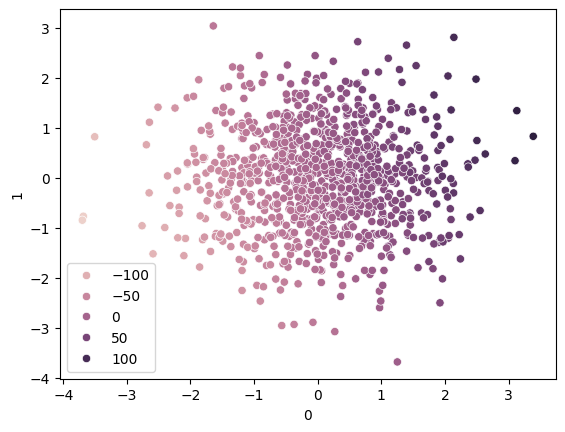

In [ ]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [ ]:
#train-test-split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x_train.shape

(800, 2)

In [ ]:
#model training
from sklearn.svm import SVR
model=SVR(kernel='linear')
model
model.fit(x_train,y_train)

SVR(kernel='linear')

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([ -8.75318142, -31.81694902, -15.3355353 ,  -0.45533759,
         1.65828807, -15.65403808, -41.03116179, -41.01147044,
        -4.67713022,  -9.64718867,  12.40237715,  19.76894604,
        49.31370523,  17.95321339,  26.6802617 , -41.23718681,
        -7.81051167, -15.17236759,  29.12221963, -31.27603982,
        21.77255301,   1.15234001, -53.11164274, -41.12640688,
        45.63899294,  -2.61830577,  54.25921597, -13.46719737,
       -22.59452323, -53.64406848,  16.88265364, -79.94740285,
       -34.38769326,  27.8060463 ,  32.06788607,  -7.06432735,
         5.5819409 ,  49.74306301,   8.7373572 ,  -7.57782191,
        29.23193424, -26.95885756,   9.95912773,  24.60600063,
        -1.84228998,  32.6165117 ,  14.63660129,  -0.33997472,
        25.01388106,  -5.77407559, -15.59821526,  66.9653054 ,
        27.95412893, -65.09823697,   1.14246302, -28.87738931,
        34.66257172, -22.94459187,  -5.8378037 ,  20.24930152,
        -5.47607158,  16.62491968,  19.20644915,   4.24

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9913248597019335

In [ ]:
#hyperparameter tuning with svr
from sklearn.model_selection import GridSearchCV
params={'C':[0.1,0.2,1,2,3,10,50,100],
        'gamma':[1,0.1,0.2,0.001,0.003],
        'kernel':['linear'],
        'epsilon':[0.01,0.1,0.2,0.3]}

In [ ]:
optimisedmodel=GridSearchCV(model,param_grid=params,cv=5,verbose=2)
optimisedmodel.fit(x_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END ........C=0.1, epsilon=0.01, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........C=0.1, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.2,

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=2)

In [ ]:
y_pred=optimisedmodel.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.9913626188779396

In [ ]:
r2_score(y_test,optimisedmodel.best_estimator_.predict(x_test))

0.9913626188779396